In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv("C:/Users/Anirudh MV/Downloads/crime_data.csv")
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


min and max

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
data= data.iloc[:,1:]

In [17]:
norm=MinMaxScaler()

In [18]:
norm.fit(data)

MinMaxScaler()

In [19]:
norm_data = norm.transform(data)

In [20]:
type(norm_data)

numpy.ndarray

In [21]:
from sklearn.cluster import KMeans

In [22]:
from scipy.spatial.distance import cdist

In [23]:
k_mean = list(range(2,15))

In [28]:
k_mean
TWSS = []
for i in k_mean:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(norm_data)
    WSS = []
    for j in range(i):
       j
       WSS.append(sum(cdist(norm_data[kmeans.labels_==j,:],
        kmeans.cluster_centers_[j].reshape(1,norm_data.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))


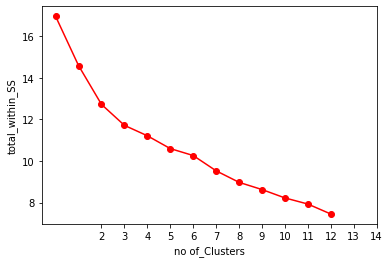

In [30]:
plt.plot(TWSS, 'ro-')
plt.xlabel("no of_Clusters")
plt.ylabel("total_within_SS")
plt.xticks(k_mean)
plt.show()

In [33]:
model = KMeans(n_clusters = 4)
model.fit(norm_data)

KMeans(n_clusters=4)

In [37]:
model.labels_
series_array=pd.Series(model.labels_)
data["clust"]=series_array

cluster1= data.iloc[:,1:4].groupby(data.clust).mean()

In [38]:
cluster1

,Assault,UrbanPop,Rape
clust,,,
0,141.176471,73.647059,19.335294
1,78.538462,52.076923,12.176923
2,243.625000,53.750000,21.412500
3,264.000000,76.500000,33.608333
